### Installing packages

In [179]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /anaconda3/lib/python3.6/site-packages (0.21.2)
You should consider upgrading via the 'pip install --upgrade pip' command.


### Import libraries

In [180]:
import sklearn

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [181]:
print(sklearn.__version__)

0.21.2


### Advertising and Sales
Source: https://www.kaggle.com/sazid28/advertising.csv/downloads/advertising.csv.zip/1

Data Fields:

TV -- amount spend on TV ads on sales in dollars.   
radio -- amount spend on radio ads on sales in dollars.   
newspaper -- amount spend on newspaper ads on sales in dollars.   
sales --- sale in dollars.

In [182]:
advertising_data = pd.read_csv('dataset/Advertising.csv', index_col=0)

advertising_data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [183]:
advertising_data.shape

(200, 4)

In [184]:
advertising_data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Visualizing relationships

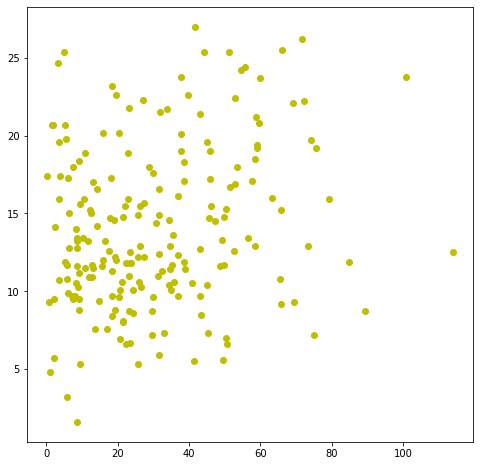

In [185]:
plt.figure(figsize=(8, 8))

plt.scatter(advertising_data['newspaper'], advertising_data['sales'], c='y')

plt.show()

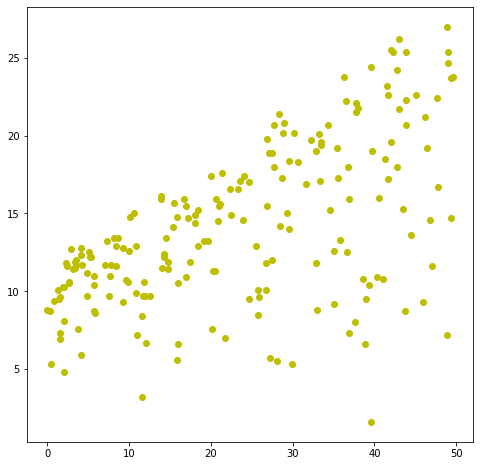

In [186]:
plt.figure(figsize=(8, 8))

plt.scatter(advertising_data['radio'], advertising_data['sales'], c='y')

plt.show()

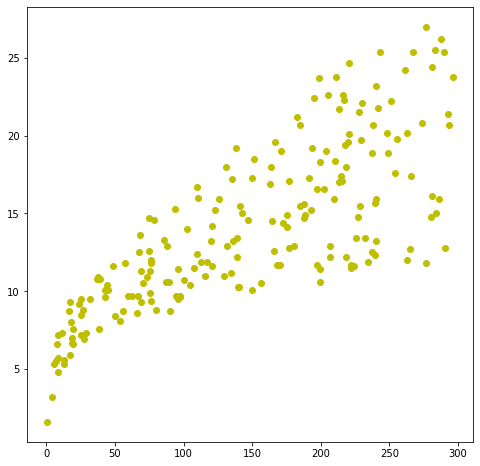

In [187]:
plt.figure(figsize=(8, 8))

plt.scatter(advertising_data['TV'], advertising_data['sales'], c='y')

plt.show()

In [188]:
advertising_data_correlation = advertising_data.corr()

advertising_data_correlation

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


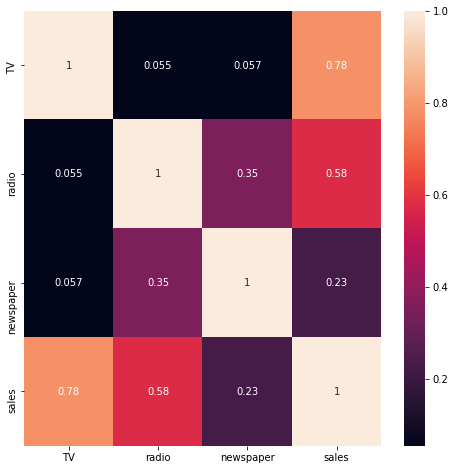

In [218]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(advertising_data_correlation, annot=True)

In [219]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

##### This time we are taking only one variable TV ads for predicting the sale

In [220]:
X = advertising_data['TV'].values.reshape(-1, 1)

Y = advertising_data['sales'].values.reshape(-1, 1)

In [192]:
X.shape, Y.shape

((200, 1), (200, 1))

In [193]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [194]:
x_train.shape, y_train.shape

((140, 1), (140, 1))

In [195]:
x_test.shape, y_test.shape

((60, 1), (60, 1))

### Statsmodels Regression Result

In [196]:
import statsmodels.api as sm

x_train_with_intercept = sm.add_constant(x_train)
stats_model = sm.OLS(y_train, x_train_with_intercept)

fit_model = stats_model.fit()

print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     172.3
Date:                Sun, 30 Jun 2019   Prob (F-statistic):           4.76e-26
Time:                        08:35:03   Log-Likelihood:                -371.64
No. Observations:                 140   AIC:                             747.3
Df Residuals:                     138   BIC:                             753.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3108      0.611     11.957      0.0

### Single Linear Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
#### Train a model for predicting the sale

In [197]:
linear_reg = LinearRegression(normalize=True).fit(x_train, y_train)

linear_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

### r_2 Score
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

In [198]:
print("Training_score : " , linear_reg.score(x_train, y_train))

Training_score :  0.5552336104251212


In [199]:
y_pred = linear_reg.predict(x_test)

In [200]:
from sklearn.metrics import r2_score

print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.725606346597073


##### Defining a function for calculating the adjusted r_2 score

In [201]:
def adjusted_r2(r_square, labels, features):
    
    adj_r_square = 1 - ((1 - r_square) * (len(labels) - 1)) / (len(labels) - features.shape[1] - 1)
    
    return adj_r_square

In [202]:
print("Adjusted_r2_score : ", adjusted_r2(r2_score(y_test, y_pred), y_test, x_test))

Adjusted_r2_score :  0.7208754215384019


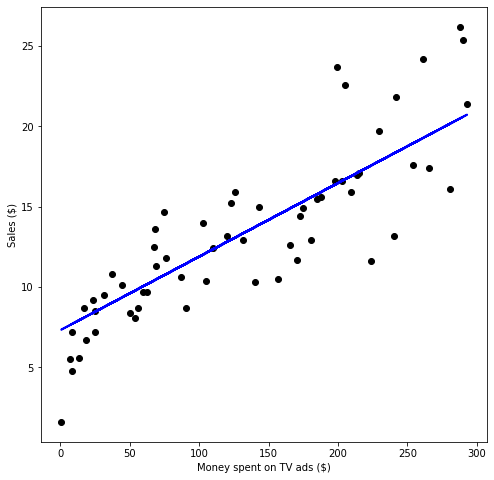

In [203]:
plt.figure(figsize=(8, 8))

plt.scatter(x_test,
            y_test,
            c='black')

plt.plot(x_test,
         y_pred,
         c='blue',
         linewidth=2)

plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")

plt.show()

### Multiple Linear Regression

##### This time we are taking multiple variables ( TV, radio and newspaper ads) for predicting the sales

In [204]:
X = advertising_data.drop('sales', axis=1)

Y = advertising_data['sales']

In [205]:
X.head(5)

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [206]:
Y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [207]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [208]:
x_train.shape, y_train.shape

((140, 3), (140,))

In [209]:
x_test.shape, y_test.shape

((60, 3), (60,))

### Statsmodels Regression Result

In [210]:
x_train_with_intercept = sm.add_constant(x_train)
stats_model = sm.OLS(y_train, x_train_with_intercept)

fit_model = stats_model.fit()

print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     400.1
Date:                Sun, 30 Jun 2019   Prob (F-statistic):           2.95e-67
Time:                        08:35:04   Log-Likelihood:                -275.61
No. Observations:                 140   AIC:                             559.2
Df Residuals:                     136   BIC:                             571.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8874      0.377      7.656      0.0

In [211]:
linear_reg = LinearRegression(normalize=True).fit(x_train, y_train)

linear_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [212]:
print("Training_score : " , linear_reg.score(x_train, y_train))

Training_score :  0.8982195243214043


In [213]:
predictors = x_train.columns

coef = pd.Series(linear_reg.coef_, predictors).sort_values()

print(coef)

newspaper    0.003738
TV           0.046975
radio        0.180877
dtype: float64


In [214]:
y_pred = linear_reg.predict(x_test)

In [215]:
print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.8857356540891204


In [216]:
print("Adjusted_r2_score : ", adjusted_r2(r2_score(y_test, y_pred), y_test, x_test))

Adjusted_r2_score :  0.8796143498438946


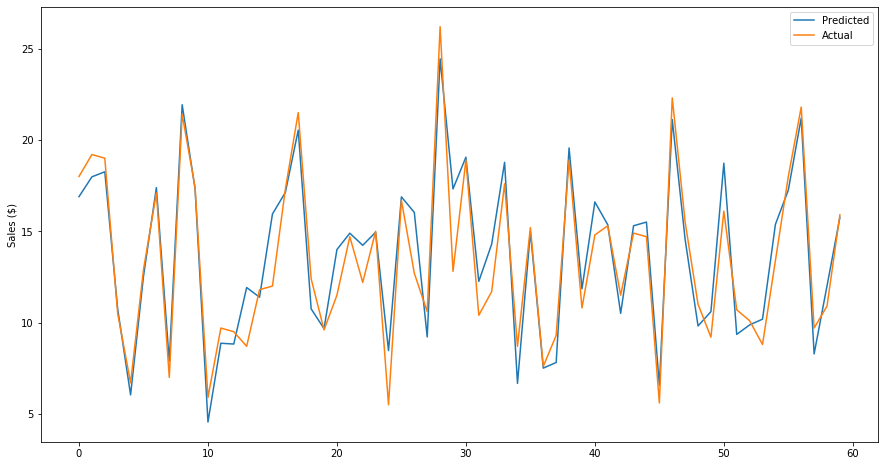

In [217]:
plt.figure(figsize = (15, 8))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel("Sales ($)")
plt.legend()
plt.show()

# Classification

### Importing libraries

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

### Pima Indians
Source: https://www.kaggle.com/mehdidag/pima-indians

1. pregnant - It represents the number of times the woman got pregnant during her life. 

2. glucose - It represents the plasma glucose concentration at 2 hours in an oral glucose tolerance test. 

3. diastolic - The blood pressure is a very well-known way to measure the health of the heart of a person, there are too measure in fact, the diastolic and the systolic. In this data set, we have the diastolic which is in the fact the pressure in (mm/Hg) when the heart relaxed after the contraction.  

4. triceps - It is a value used to estimate body fat (mm) which is measured on the right arm halfway between the olecranon process of the elbow and the acromial process of the scapula.  

5. insulin - It represents the rate of insulin 2 hours serum insulin (mu U/ml).  

6. bmi - It represents the Body Mass Index (weight in kg / (height in meters squared), and is an indicator of the health of a person.  

7. diabetes - It is an indicator of history of diabetes in the family.   

8. age - It represents the age in years of the Pima’s woman.   

9. test - It can take only 2 values (‘negatif’ or ‘positif’) and represents if the patient shows signs of diabetes.

In [3]:
diabetes_data = pd.read_csv('dataset/PimaIndians.csv')

diabetes_data.head(10)

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,1,89,66,23,94,28.1,0.167,21,negatif
1,0,137,40,35,168,43.1,2.288,33,positif
2,3,78,50,32,88,31.0,0.248,26,positif
3,2,197,70,45,543,30.5,0.158,53,positif
4,1,189,60,23,846,30.1,0.398,59,positif
5,5,166,72,19,175,25.8,0.587,51,positif
6,0,118,84,47,230,45.8,0.551,31,positif
7,1,103,30,38,83,43.3,0.183,33,negatif
8,1,115,70,30,96,34.6,0.529,32,positif
9,3,126,88,41,235,39.3,0.704,27,negatif


In [4]:
diabetes_data.shape

(392, 9)

In [5]:
diabetes_data.describe()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000


In [6]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()

diabetes_data['test'] = label_encoding.fit_transform(diabetes_data['test'].astype(str))

diabetes_data.sample(10)

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
41,6,144,72,27,228,33.9,0.255,40,0
184,3,173,82,48,465,38.4,2.137,25,1
307,1,89,24,19,25,27.8,0.559,21,0
71,1,136,74,50,204,37.4,0.399,24,0
136,1,119,86,39,220,45.6,0.808,29,1
124,11,155,76,28,150,33.3,1.353,51,1
303,2,112,78,50,140,39.4,0.175,24,0
12,1,97,66,15,140,23.2,0.487,22,0
20,1,103,80,11,82,19.4,0.491,22,0
126,5,96,74,18,67,33.6,0.997,43,0


In [7]:
label_encoding.classes_

array(['negatif', 'positif'], dtype=object)

In [8]:
pd.crosstab(diabetes_data['pregnant'], diabetes_data['test'])

test,0,1
pregnant,,
0,37,19
1,73,20
2,52,12
3,26,19
4,21,6
5,13,8
6,15,4
7,10,10
8,3,11


### Visualizing Relationships

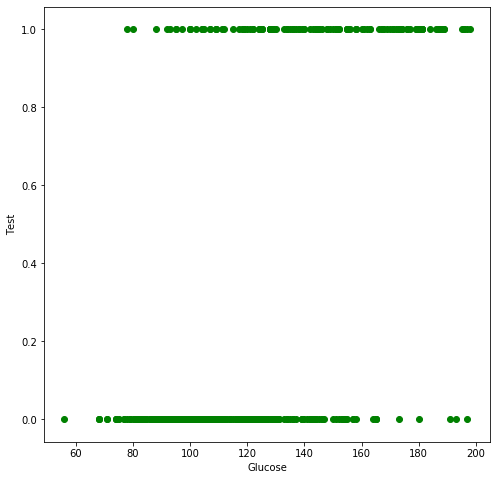

In [15]:
plt.figure(figsize=(8, 8))

plt.scatter(diabetes_data['glucose'], diabetes_data['test'], c='g')

plt.xlabel('Glucose')
plt.ylabel('Test')

plt.show()

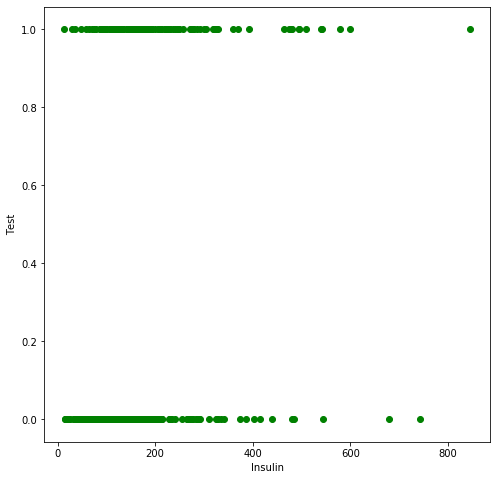

In [16]:
plt.figure(figsize=(8, 8))

plt.scatter(diabetes_data['insulin'], diabetes_data['test'], c='g')

plt.xlabel('Insulin')
plt.ylabel('Test')

plt.show()

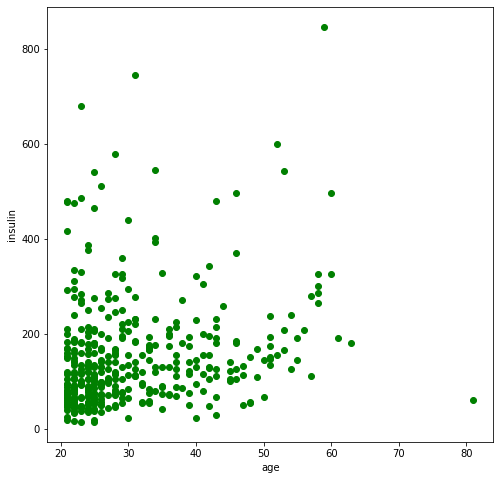

In [17]:
plt.figure(figsize=(8, 8))

plt.scatter(diabetes_data['age'], diabetes_data['insulin'], c='g')

plt.xlabel('age')
plt.ylabel('insulin')

plt.show()

In [18]:
diabetes_data_correlation = diabetes_data.corr()

diabetes_data_correlation

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
pregnant,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
diastolic,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
triceps,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
bmi,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
diabetes,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
test,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


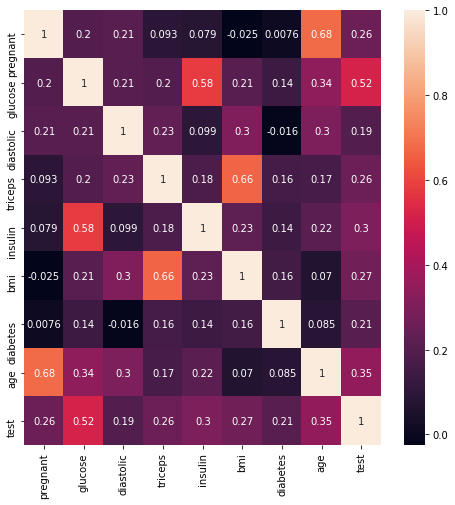

In [19]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(diabetes_data_correlation, annot=True)

In [21]:
features = diabetes_data.drop('test', axis=1)

features.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age
0,1,89,66,23,94,28.1,0.167,21
1,0,137,40,35,168,43.1,2.288,33
2,3,78,50,32,88,31.0,0.248,26
3,2,197,70,45,543,30.5,0.158,53
4,1,189,60,23,846,30.1,0.398,59


In [22]:
features.describe()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000


In [23]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()

In [25]:
features_scaled = standard_scaler.fit_transform(features)

features_scaled.shape

(392, 8)

In [26]:
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

features_scaled_df.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age
0,-0.717427,-1.091046,-0.373655,-0.585110,-0.522842,-0.710421,-1.031876,-0.968299
1,-1.029213,0.466314,-2.456964,0.557421,0.100631,1.426730,5.115111,0.209585
2,-0.093854,-1.447941,-1.655691,0.271788,-0.573394,-0.297238,-0.797126,-0.477514
3,-0.405640,2.413014,-0.053146,1.509530,3.260122,-0.368477,-1.057960,2.172726
4,-0.717427,2.153454,-0.854419,-0.585110,5.812990,-0.425468,-0.362402,2.761668


In [27]:
features_scaled_df.describe()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-4.021726e-17,3.129583e-17,-4.641624e-16,1.042250e-16,6.485742e-17,1.543550e-16,3.880116e-17,1.028089e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.029213e+00,-2.161731e+00,-3.739001e+00,-2.108484e+00,-1.196867e+00,-2.120941e+00,-1.269525e+00,-9.682991e-01
25%,-7.174265e-01,-7.665958e-01,-6.941640e-01,-7.755315e-01,-6.681786e-01,-6.676780e-01,-7.340909e-01,-7.719850e-01
50%,-4.056403e-01,-1.176959e-01,-5.314565e-02,-1.384444e-02,-2.574448e-01,1.621036e-02,-2.131475e-01,-3.793569e-01
75%,5.297185e-01,6.609841e-01,5.878727e-01,7.478426e-01,2.859877e-01,5.718696e-01,4.751644e-01,5.040564e-01
max,4.271153e+00,2.445459e+00,3.151946e+00,3.223325e+00,5.812990e+00,4.846172e+00,5.497667e+00,4.921123e+00


In [31]:
diabetes_data = pd.concat([features_scaled_df, diabetes_data['test']], axis=1).reset_index(drop=True)

diabetes_data.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,-0.717427,-1.091046,-0.373655,-0.585110,-0.522842,-0.710421,-1.031876,-0.968299,0
1,-1.029213,0.466314,-2.456964,0.557421,0.100631,1.426730,5.115111,0.209585,1
2,-0.093854,-1.447941,-1.655691,0.271788,-0.573394,-0.297238,-0.797126,-0.477514,1
3,-0.405640,2.413014,-0.053146,1.509530,3.260122,-0.368477,-1.057960,2.172726,1
4,-0.717427,2.153454,-0.854419,-0.585110,5.812990,-0.425468,-0.362402,2.761668,1


### Saving the processed data in csv format

In [32]:
diabetes_data.to_csv('dataset/PimaIndians_processed.csv', index=False)

In [33]:
!ls dataset

A_Z Handwritten Data.csv  _DS_Store                 insurance.csv
Advertising.csv           _ipynb_checkpoints        insurance_processed.csv
PimaIndians.csv           dbpedia.csv               mouse.csv
PimaIndians_processed.csv driver_dataset.csv


In [34]:
from sklearn.model_selection import train_test_split

X = diabetes_data.drop('test', axis=1)
Y = diabetes_data['test']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [41]:
x_train.shape, y_train.shape

((274, 8), (274,))

In [42]:
x_test.shape, y_test.shape

((118, 8), (118,))

### Logistic Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#### Train the model for predicting the test result ( pos or neg)

In [43]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')

classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
# For recording: First do the Logistic regression, then just paste this in and shift-enter the rest
# from sklearn.tree import DecisionTreeClassifier

# classifier = DecisionTreeClassifier(max_depth=4)

# classifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [55]:
y_pred = classifier.predict(x_test)

y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0])

In [56]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})

pred_results.head(10)

,y_pred,y_test
299,0,0
278,0,0
380,0,0
3,1,1
152,0,1
239,0,0
377,0,0
8,0,1
216,1,1
300,0,0


In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

### Accuracy Score
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

### Precision Score
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

### Recall Score
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

In [58]:
model_accuracy = accuracy_score(y_test, y_pred)
model_precision = precision_score(y_test, y_pred)
model_recall = recall_score(y_test, y_pred)

print("Accuracy of the model is {}% " .format( model_accuracy * 100))
print("Precision of the model is {}% " .format(model_precision * 100))
print("Recall of the model is {}% " .format(model_recall * 100))

Accuracy of the model is 75.42372881355932% 
Precision of the model is 65.21739130434783% 
Recall of the model is 69.76744186046511% 


In [59]:
diabetes_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)

diabetes_crosstab

y_test,0,1
y_pred,,
0,59,13
1,16,30


In [60]:
TP = diabetes_crosstab[1][1]
TN = diabetes_crosstab[0][0]
FP = diabetes_crosstab[0][1]
FN = diabetes_crosstab[1][0]

In [61]:
accuracy_score_verified = (TP + TN) / (TP + FP + TN + FN)

accuracy_score_verified

0.7542372881355932

In [62]:
precision_score_survived = TP / (TP + FP)

precision_score_survived

0.6521739130434783

In [63]:
recall_score_survived = TP / (TP + FN)

recall_score_survived

0.6976744186046512

# Clustering

### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Driver Dataset
Source: https://raw.githubusercontent.com/datascienceinc/learn-data-science/master/Introduction-to-K-means-Clustering/Data/data_1024.csv

In [21]:
drivers_data = pd.read_csv('dataset/driver_dataset.csv', sep='\t')

drivers_data.head(10)

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0
5,3423313857,41.91,10.0
6,3423312432,58.64,20.0
7,3423311434,52.02,8.0
8,3423311328,31.25,34.0
9,3423312488,44.31,19.0


In [22]:
drivers_data.shape

(4000, 3)

In [23]:
drivers_data = drivers_data.sample(frac=1)

##### Dropping the ID column

In [24]:
drivers_data.drop('Driver_ID', axis=1, inplace=True)

drivers_data.sample(10)

,Distance_Feature,Speeding_Feature
2586,47.04,4.0
2823,52.60,4.0
2825,64.98,3.0
1455,36.19,2.0
1327,56.57,8.0
371,63.20,40.0
2389,54.92,2.0
3106,45.03,11.0
1746,51.67,5.0
29,56.04,39.0


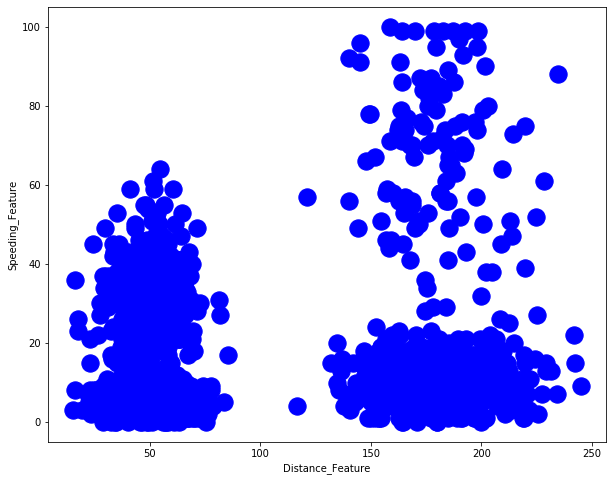

In [25]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.scatter(drivers_data['Distance_Feature'], 
            drivers_data['Speeding_Feature'], 
            s = 300, 
            c='blue')

plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')

plt.show()

### Kmeans
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


In [63]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=4, max_iter=1000).fit(drivers_data)

## For recording start with 4, then 3 then 2 and change this code and hit shift-enter
# kmeans_model = KMeans(n_clusters=3, max_iter=1000).fit(drivers_data)
# kmeans_model = KMeans(n_clusters=2, max_iter=1000).fit(drivers_data)

In [64]:
kmeans_model.labels_[::40]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int32)

In [65]:
np.unique(kmeans_model.labels_)

array([0, 1], dtype=int32)

In [66]:
zipped_list = list(zip(np.array(drivers_data), kmeans_model.labels_))

zipped_list[1000:1010]

[(array([42.04,  5.  ]), 0),
 (array([48.67,  3.  ]), 0),
 (array([55.28, 36.  ]), 0),
 (array([203.41,   7.  ]), 1),
 (array([34.68,  7.  ]), 0),
 (array([164.03,  86.  ]), 1),
 (array([31.62,  2.  ]), 0),
 (array([41.59,  3.  ]), 0),
 (array([41.95, 28.  ]), 0),
 (array([40.1,  4. ]), 0)]

In [67]:
centroids = kmeans_model.cluster_centers_

centroids

array([[ 50.04763437,   8.82875   ],
       [180.017075  ,  18.29      ]])

##### plotting centroids along with data points

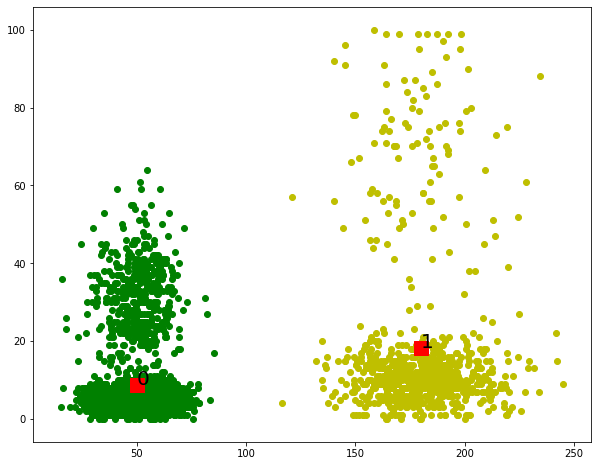

In [68]:
colors = ['g', 'y', 'b', 'k']
    
plt.figure(figsize=(10, 8))

for element in zipped_list:
    plt.scatter(element[0][0], element[0][1], 
                c=colors[(element[1] % len(colors))])
    
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=200, marker='s')

for i in range(len(centroids)):
    plt.annotate( i, (centroids[i][0], centroids[i][1]), fontsize=20)

##### with no of clusters = 4 silhouette score decreased

In [69]:
from sklearn.metrics import silhouette_score

print("Silhouette score: ", silhouette_score(drivers_data, kmeans_model.labels_))

Silhouette_score:  0.8490223286225532


### Importing libraries